# Linear Models

<div class="alert alert-success">
Linear (regression) modelling is a method of predicting the value of an output value as a linear combination of weighted input values.
</div>

## Linear Models - Overview

In the simplest case, we are trying to fit a line. In this case, our model is of the form:

$$ y = ax + b $$

In this equation above, we are trying to predict some data variable $y$, from some other data variable $x$, where $a$ and $b$ are parameters we need to figure out (learn), by fitting the model, and which reflect the slope and y-intercept of the model (line), respectively.

We need some procedure to go about finding $a$ and $b$. We will use *ordinary least squares* (OLS) to do so - the values of $a$ and $b$ we want are those that fulfill the OLS solution - meaning the values that lead to the smallest distance between the predictions of the model, and our data. 

Note that to train this kind of model, you need data in which you know both $x$ and $y$ already, to train your model. This kind of model only applies to predicting values you have at least some information about. 

Having training data makes it a 'supervised' model, meaning that learning the prediction model is 'supervised' or guided by knowing some 'answers' to our prediction problem already, and the goal is to use this data to learn a model that can generalize to new data. 

This approach can also be generalized, including, for example, more features used to predict our output of interest. 

Therefore, we will rewrite our model, in the general form, as:

$$ y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_d x_d + \epsilon $$

In the equation above $a_0$ is the intercept (the same as $b$ from above), and $a_1$ to $a_d$ are $d$ parameters that we are trying to learn, as weights for data features $x_1$ to $x_d$. Our output variable (what we are trying to predict) is still $y$, and we've introduced $\epsilon$, which is the error, which basically captures unexplained variance.

### Linear Models Practice

In the following, we will generate some data, with two features, that we'll call `d1` and `d2`. 

We will generate this data such that `d1` and `d2` are correlated. This means that they share some information, and so we can use this to property to try and predict values of `d2` from `d1`, using a linear model to do so. 

This model, using the second notation from above, will be of the form:

$$ d2 = a_0 + a_1 * d1 $$

Where `a_0` and `a_1` are parameters of the model that we are trying to learn, reflecting the intercept and slope, respectively. 

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statmodels
import statsmodels.formula.api as smf

First, lets generate some example data to use.

In [2]:
# Set random seed, for consistency simulating data
np.random.seed(21)

# Settings
corr = 0.75
covs = [[1, corr], [corr, 1]]
means = [0, 0]

# Generate the data
data = np.random.multivariate_normal(means, covs, 1000)

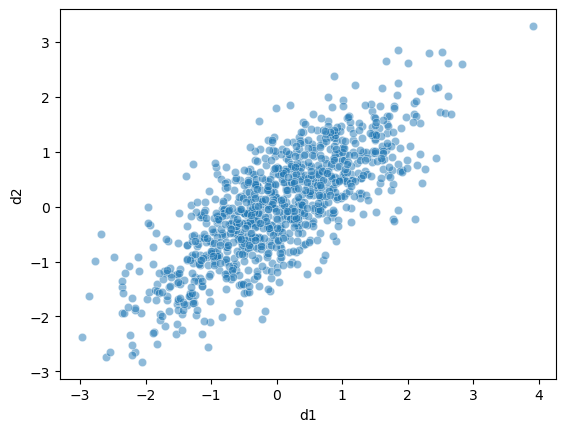

In [3]:
# Check out the data we generated
sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.5)
plt.xlabel('d1')
plt.ylabel('d2')
plt.show()

In [4]:
# Put the data into a DataFrame
df = pd.DataFrame(data, columns=['d1', 'd2'])

In [5]:
# Have a quick look at the simualed data
df.head()

,d1,d2
0,0.087922,0.009294
1,-0.530187,-1.418836
2,-0.092297,-1.302195
3,0.275502,0.109635
4,-1.050818,-1.059746


In [6]:
# Check the correlation between d1 & d2 (that it matches what was synthesized)
df.corr()

,d1,d2
d1,1.000000,0.773245
d2,0.773245,1.000000


## Linear Models with Statsmodels & Patsy

<div class="alert alert-success">
Statsmodels is a module for statistical analyses in Python.
</div>

<div class="alert alert-info">
Here is the official documentation for
<a href="http://www.statsmodels.org/stable/index.html" class="alert-link">statsmodels</a>.
</div>

We can use `statsmodels.formula.api`, or `smf` for short, to initialize an OLS model object. 

In [7]:
# Initialize an OLS model object
#   Note: This initializes the model, and provides the data 
#         but does not actually compute the model yet

model = smf.ols('d2 ~ d1', df) # The string 'd2 ~ d1' indicates we want to predict d2 as a function of d1

Note that `statsmodels`, just like `sklearn` that we will encounter a bit later, uses an object-oriented approach. 

In this approach you initialize objects that store the data and methods (functions) together. This allows for an organized approach to storing and checking data and parameters, and applying computations to them, such as fitting models. Output parameters of the model are also stored in the object, which can then be used to make predictions.

In [8]:
# Check the type of the model object we just created.
#  You can also explore, with tab-complete, what methods are available from this object
type(model)

statsmodels.regression.linear_model.OLS

Now that we've initialized our model and fed it our data and formula we want it to fit, let's compute the model using the `fit()` method.

In [9]:
# Finally, fit the model
results = model.fit()

The model has been fit, and now we can look at the results:

In [10]:
# Check out the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     d2   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1484.
Date:                Wed, 14 May 2025   Prob (F-statistic):          1.18e-199
Time:                        15:59:45   Log-Likelihood:                -953.74
No. Observations:                1000   AIC:                             1911.
Df Residuals:                     998   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0116      0.020     -0.582      0.5

### Interpreting Outputs

`statsmodels` gives us a lot of information! There's 3 sections to the summary results:

The top section is largely meta-data: it includes things like the model type, and time and date of us running it.  It also includes the `R-squared`, which is the overall proportion of the variance in $y$ which the model is able to explain using $x$. R-squared values are bound between 0-1. An r-squared of ~0.5, which we have here, is quite a high value, suggesting a good model fit.

The middle section includes the actual model results. Each row reflects a parameter, and gives us it's value / estimated effect size (`coef`), the error (`std err`), the results of a statistical test regarding whether this parameter is a significant predictor of the output variable (`t`, and its associated p-value as `P>|t|`), and the confidence interval of the parameter's value/coefficient (`[0.025` - `0.975]`).

The last section includes some other tests that are run on the data. These can be used to check for certain properties of the input data, and to check that the necessary assumptions of the model are met. 

### Checking our Model

In terms of the model itself, the most useful components are in the second row, in which the summary gives the parameter values and p-values of our predictors, which in this case are 'Intercept', and 'd1'. 

From the results above, we can grab the values of the parameters, and obtain the following model:

$$ d2 = -0.0116 + 0.7396 * d1 $$

However, we should also keep in mind whether each parameter is significant. To check use, let's look at the statistical test which was also reported - it checks whether the parameter value is significant (as in, significantly different from zero). Using an alpha value of 0.05, in this case, the 'd2' parameter value is significant, but the 'Intercept' value is not. Since the parameter value for 'Intercept' is not significantly different from zero, we can decide not to include it in our final model. 

We therefore finish with the model:
$$ d2 = 0.7396 * d1 $$

Assessing this model, it looks promising that the value of $a_1 = 0.7396$ is very close to the correlation coefficient we originally set to $0.75$ when generating the data points! This suggests our model is working well!

### Visualizing our Model

Next, we can visualize our model, with our data.

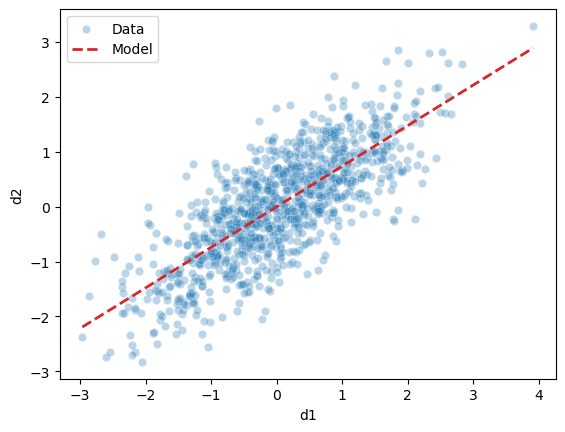

In [11]:
# Plot the orginal data (as before)
sns.scatterplot(x=df['d1'], y=df['d2'], alpha=0.3, label='Data', color='tab:blue')

# Generate and plot the model fit line
xs = np.arange(df['d1'].min(), df['d1'].max(), 0.001)
ys = 0.7396 * xs
plt.plot(xs, ys, '--', linewidth=2, label='Model', color='tab:red')

plt.xlabel('d1')
plt.ylabel('d2')
plt.legend()
plt.show()

### Using multiple predictors

The model above used only one predictor, fitting a straight line to the data. This is similar to previous examples we've seen and tried for fitting lines.

But we can also fit more than 1 predictor variable, and that is where the power and benefits of using `statsmodels` really comes through. We can use these tools to specify any models we want, including multiple predictors with different kinds of interactions between predictors, and it takes care of fitting the models for us. 

To briefly explore this, let's now add a new variable to our dataframe, and fit an OLS model with two predictors. 

In this case, we will fit a model of the form:

$$ d1 = a_0 + a_1 * d2 + a_1 * d3 $$

In [12]:
# Add a new column of data to df
df['d3'] = pd.Series(np.random.randn(1000), index=df.index)
df.head()

,d1,d2,d3
0,0.087922,0.009294,-1.611758
1,-0.530187,-1.418836,1.933703
2,-0.092297,-1.302195,0.334072
3,0.275502,0.109635,-0.124464
4,-1.050818,-1.059746,0.278050


In [13]:
# Predict d1 from d2 and d3
model = smf.ols('d1 ~ d2 + d3', df) # Now we are predicting d1 as a function of d2 and d3
results = model.fit()

In [14]:
# Check the model fit summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     d1   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     745.1
Date:                Wed, 14 May 2025   Prob (F-statistic):          1.21e-198
Time:                        15:59:45   Log-Likelihood:                -996.62
No. Observations:                1000   AIC:                             1999.
Df Residuals:                     997   BIC:                             2014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0179      0.021      0.861      0.3

Note that, in this case, we generated the `d3` column with no relation to the `d1` values we were trying to predict, so the `d3` predictor isn't significant (its p-value is large), and overall this bigger model with two features doesn't explain any more of the variance in the data than the previous one (the R-squared is no better). 



### Conclusion

`statsmodels` offers a powerful and general approach to fitting statistical models to data, investigating properties of these model fits, and comparing between models. You can further investigate how to include other features, such as interactions between input variables, and so on. 

## Linear Regression with sklearn

As we've already seen with the `OLS` tutorial, there are multiple ways to apply the same underlying computations. 

Another popular module that can be used for fitting models to data is `sklearn`. 

Here, for a quick demonstration and comparison, we will fit the `sklearn` implementation of Linear Regression models to our same data. The underlying computations are approximately the same, but as we can see, the API for using `sklearn` and the exact results are different.

<div class="alert alert-info">
Linear regression in 
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" class="alert-link">sklearn</a>.
</div>

In [15]:
# Linear Models with sklearn
from sklearn import linear_model

In [16]:
# Convert data into arrays for easier use with sklearn
d1 = np.reshape(df.d1.values, [len(df.d1), 1])
d2 = np.reshape(df.d2.values, [len(df.d2), 1])
d3 = np.reshape(df.d3.values, [len(df.d3), 1])

In [17]:
# Initialize linear regression model
reg = linear_model.LinearRegression()

In [18]:
# Fit the linear regression model
reg.fit(d2, d1)  # d1 = a0 + a1*d2

LinearRegression()

In [19]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print('The intercept value is: \t{:1.4f}'.format(reg.intercept_[0]))
print('The coefficient value is: \t{:1.4f}'.format(reg.coef_[0][0]))

The intercept value is: 	0.0164
The coefficient value is: 	0.8084


### Using multiple predictors (in sklearn)

In [20]:
# Initialize and fit linear model
# d1 = a0 + a1*d2 + a2*d3
reg = linear_model.LinearRegression()
reg.fit(np.hstack([d2, d3]), d1)

LinearRegression()

In [21]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print('Intercept: \t {:+1.4f}'.format(reg.intercept_[0]))
print('d2 value:\t {:+1.4f}'.format(reg.coef_[0][0]))
print('d2 value:\t {:+1.4f}'.format(reg.coef_[0][1]))

Intercept: 	 +0.0179
d2 value:	 +0.8070
d2 value:	 -0.0368


### Conclusion

The pattern of results with `sklearn` is about the same as before, though we can see there is some small differences in estimation. In general, if you have data organized into Dataframes, then `statsmodels` does offer a more direct way to apply statistical models, but `sklearn` does also offer a lot of useful functionality for model fitting & analysis. 